In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('train_data.csv')
train

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0


In [5]:
test = pd.read_csv('test_data.csv')
test

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0


In [6]:
train.describe()


,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [7]:
test.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,7.292000e+03,7292.000000,7.292000e+03,7292.000000,7292.000000,7292.0,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000
mean,5.078209e+06,0.428415,1.858672e+05,-15957.958722,59283.630691,1.0,0.230389,0.294158,0.087493,2.202139,-26.270022,0.016045
std,4.208243e+04,0.744350,1.032964e+05,4190.990010,137642.577749,0.0,0.421111,0.455695,0.282576,0.909726,16.563032,0.125657
min,5.008809e+06,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.041912e+06,0.000000,1.170000e+05,-19382.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.069416e+06,0.000000,1.575000e+05,-15522.000000,-1534.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115503e+06,1.000000,2.250000e+05,-12454.000000,-397.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,14.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000


In [8]:
train.mean()

<ipython-input-8-b2f34c448aca>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.mean()


ID                     5.078232e+06
Children count         4.307903e-01
Income                 1.868904e+05
Age                   -1.597948e+04
Employment length      5.925776e+04
Has a mobile phone     1.000000e+00
Has a work phone       2.243100e-01
Has a phone            2.949769e-01
Has an email           9.027944e-02
Family member count    2.197531e+00
Account age           -2.613773e+01
Is high risk           1.710955e-02
dtype: float64

In [9]:
test.mean()

<ipython-input-9-a428e52fa3ce>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.mean()


ID                     5.078209e+06
Children count         4.284147e-01
Income                 1.858672e+05
Age                   -1.595796e+04
Employment length      5.928363e+04
Has a mobile phone     1.000000e+00
Has a work phone       2.303895e-01
Has a phone            2.941580e-01
Has an email           8.749314e-02
Family member count    2.202139e+00
Account age           -2.627002e+01
Is high risk           1.604498e-02
dtype: float64

In [10]:
train.median()

<ipython-input-10-4f4a9c1154f5>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.median()


ID                     5074666.0
Children count               0.0
Income                  157500.0
Age                     -15565.0
Employment length        -1557.0
Has a mobile phone           1.0
Has a work phone             0.0
Has a phone                  0.0
Has an email                 0.0
Family member count          2.0
Account age                -24.0
Is high risk                 0.0
dtype: float64

In [11]:
test.median()

<ipython-input-11-b51c85c92acd>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.median()


ID                     5069415.5
Children count               0.0
Income                  157500.0
Age                     -15522.0
Employment length        -1534.0
Has a mobile phone           1.0
Has a work phone             0.0
Has a phone                  0.0
Has an email                 0.0
Family member count          2.0
Account age                -24.0
Is high risk                 0.0
dtype: float64

In [12]:
train.std()

<ipython-input-12-3f98fe744294>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.std()


ID                      41824.000708
Children count              0.741882
Income                 101409.644327
Age                      4202.997485
Employment length      137655.883458
Has a mobile phone          0.000000
Has a work phone            0.417134
Has a phone                 0.456040
Has an email                0.286587
Family member count         0.912189
Account age                16.486702
Is high risk                0.129682
dtype: float64

In [13]:
test.std()

<ipython-input-13-892a85127686>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.std()


ID                      42082.429801
Children count              0.744350
Income                 103296.431600
Age                      4190.990010
Employment length      137642.577749
Has a mobile phone          0.000000
Has a work phone            0.421111
Has a phone                 0.455695
Has an email                0.282576
Family member count         0.909726
Account age                16.563032
Is high risk                0.125657
dtype: float64

In [14]:
train.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [15]:
test.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

In [18]:
train.shape

(29165, 20)

In [19]:
test.shape

(7292, 20)

In [20]:
print("\nMissing values in the dataset:")
print(train.isnull().sum())



Missing values in the dataset:
ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [21]:
print("\nMissing values in the dataset:")
print(test.isnull().sum())



Missing values in the dataset:
ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64


In [22]:
# Fill missing values in 'Job title' column with 'Unknown'
train['Job title'] = train['Job title'].fillna('Unknown')



In [23]:
train.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

In [24]:
test['Job title'] = test['Job title'].fillna('Unknown')

In [25]:
test.isnull().sum()

ID                     0
Gender                 0
Has a car              0
Has a property         0
Children count         0
Income                 0
Employment status      0
Education level        0
Marital status         0
Dwelling               0
Age                    0
Employment length      0
Has a mobile phone     0
Has a work phone       0
Has a phone            0
Has an email           0
Job title              0
Family member count    0
Account age            0
Is high risk           0
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

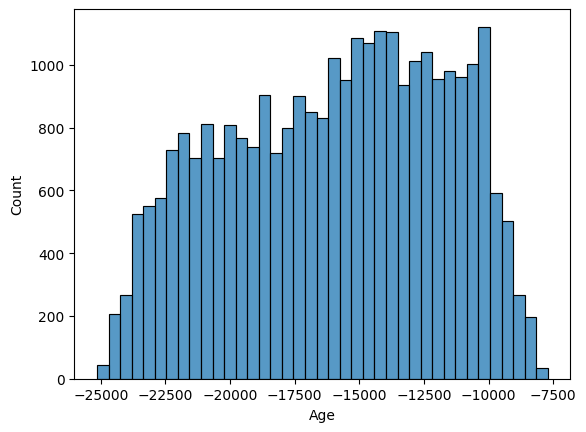

In [26]:
sns.histplot(train['Age'])


<Axes: xlabel='Gender', ylabel='Count'>

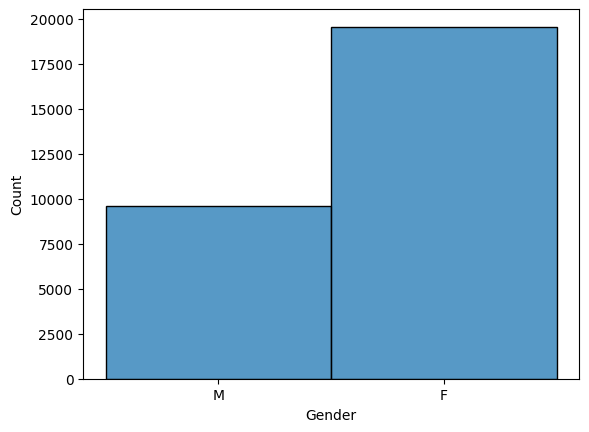

In [27]:
sns.histplot(train['Gender'])


<Axes: xlabel='Income', ylabel='Count'>

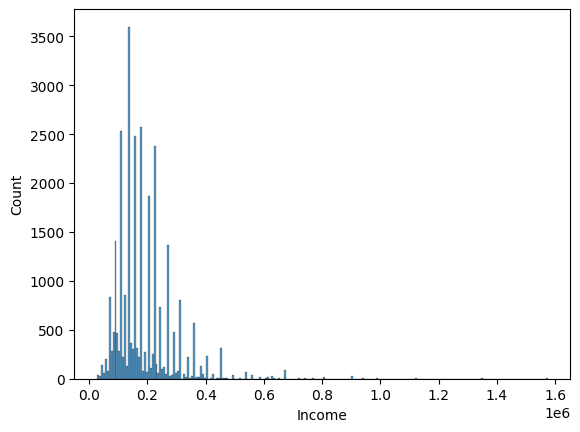

In [28]:
sns.histplot(train['Income'])

<Axes: xlabel='Age', ylabel='Count'>

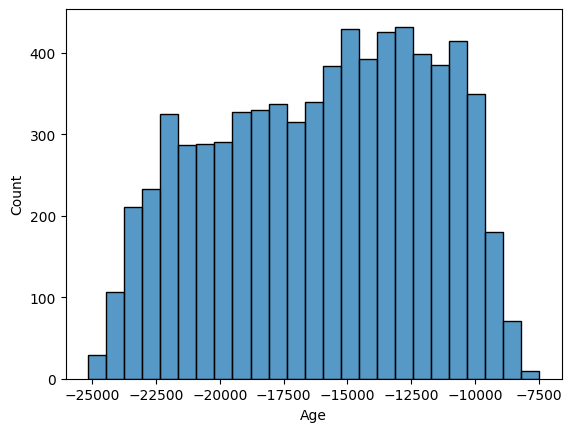

In [29]:
sns.histplot(test['Age'])


<Axes: xlabel='Gender', ylabel='Count'>

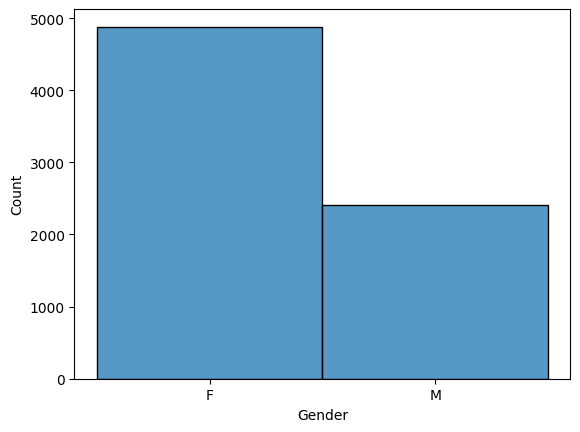

In [30]:
sns.histplot(test['Gender'])

<Axes: xlabel='Income', ylabel='Count'>

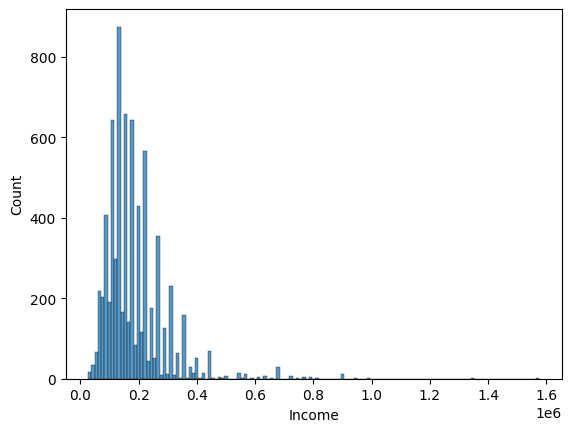

In [31]:
sns.histplot(test['Income'])

<Axes: xlabel='Gender', ylabel='Income'>

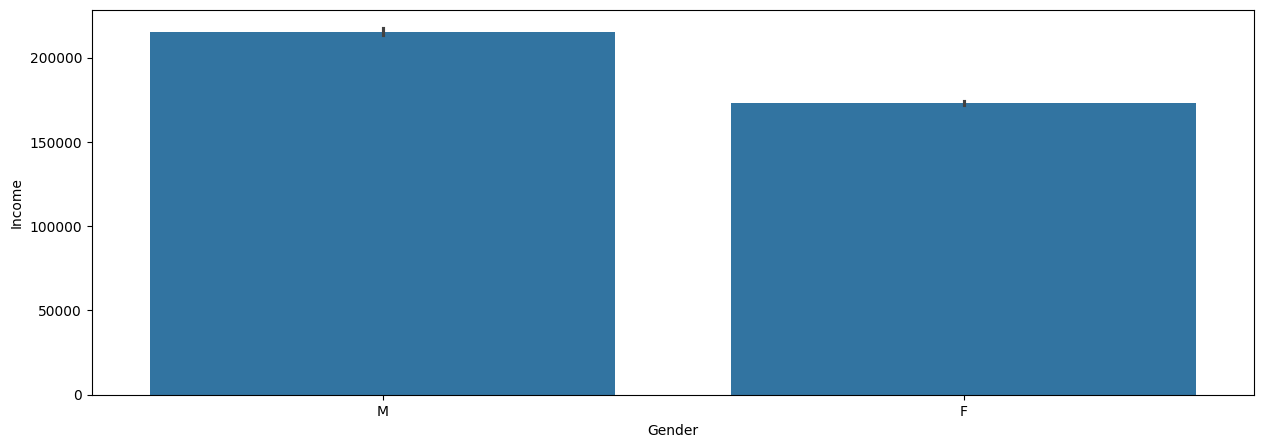

In [32]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.barplot(x=train['Gender'], y=train['Income'])

<Axes: xlabel='Gender', ylabel='Income'>

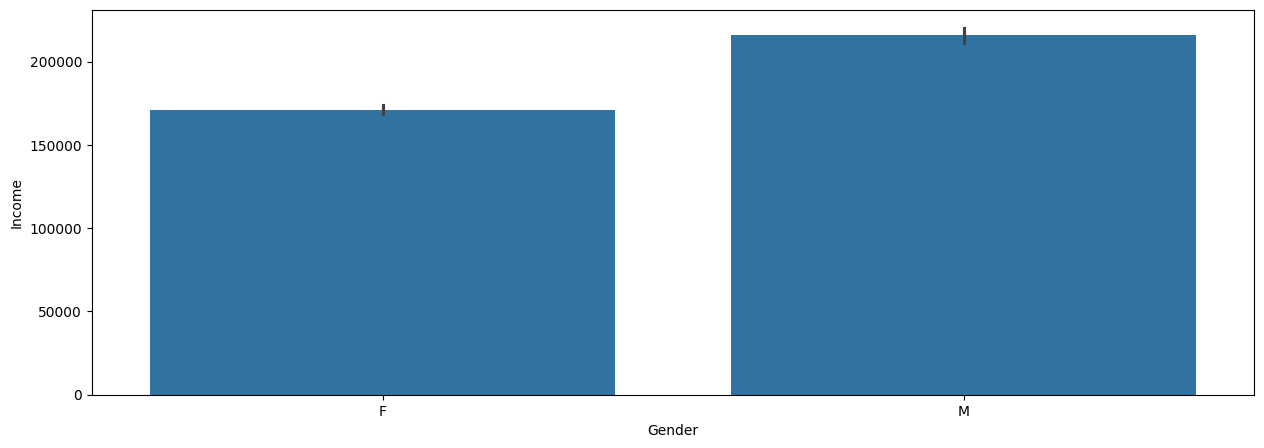

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
sns.barplot(x=test['Gender'], y=test['Income'])

In [34]:
X_train = train.drop(columns=['Is high risk'])
y_train = train['Is high risk']

X_test = test.drop(columns=['Is high risk'])
y_test = test['Is high risk']

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
model =  DecisionTreeClassifier()

In [37]:
X_train_encoded = pd.get_dummies(X_train)

In [38]:
model.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [39]:
X_test_encoded = pd.get_dummies(X_test)

In [40]:
y_pred=model.predict(X_test_encoded)

In [41]:
accuracydt = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracydt)

Accuracy: 0.9707899067471202


In [42]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


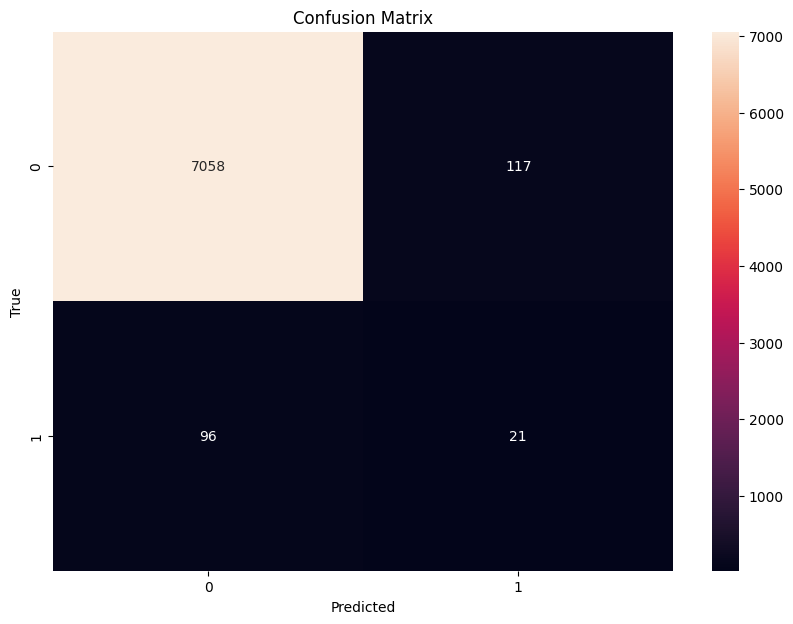

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7175
           1       0.15      0.18      0.16       117

    accuracy                           0.97      7292
   macro avg       0.57      0.58      0.57      7292
weighted avg       0.97      0.97      0.97      7292



ROC AUC Score: 0.5815902796390601


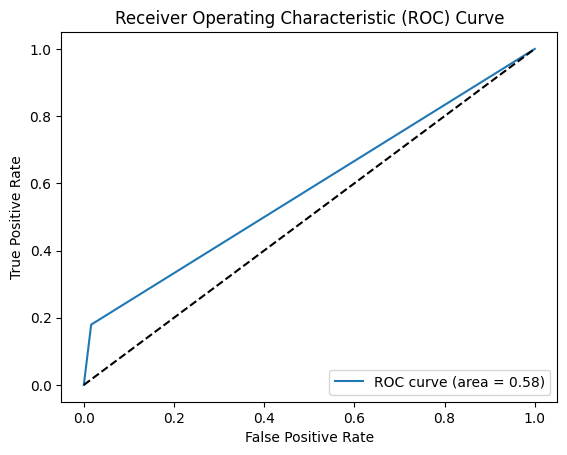

In [45]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# Optionally, you can plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [46]:
model =  LogisticRegression()

In [47]:
X_train_encoded = pd.get_dummies(X_train)

In [48]:
model.fit(X_train_encoded, y_train)

LogisticRegression()

In [49]:
X_test_encoded = pd.get_dummies(X_test)

In [50]:
y_pred=model.predict(X_test_encoded)

In [51]:
accuracylor = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracylor)

Accuracy: 0.9839550191991223


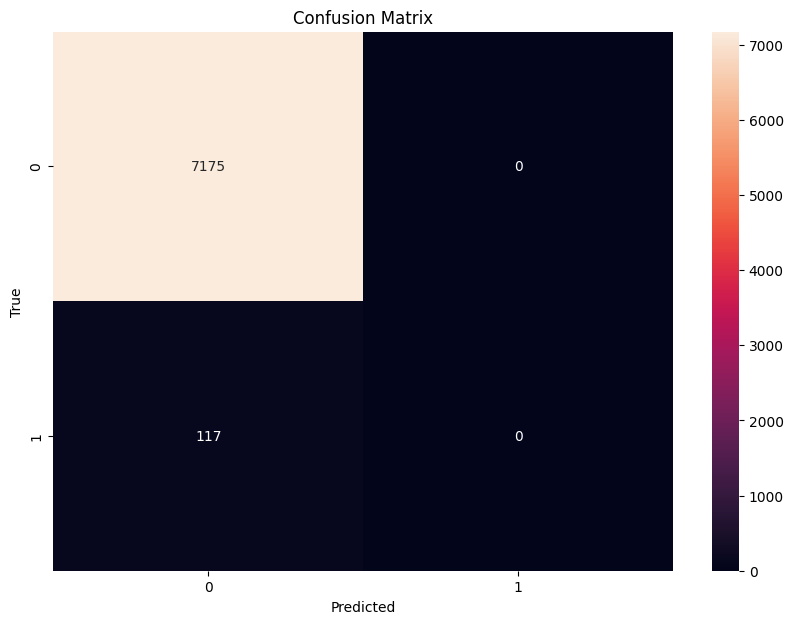

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7175
           1       0.00      0.00      0.00       117

    accuracy                           0.98      7292
   macro avg       0.49      0.50      0.50      7292
weighted avg       0.97      0.98      0.98      7292



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC AUC Score: 0.5


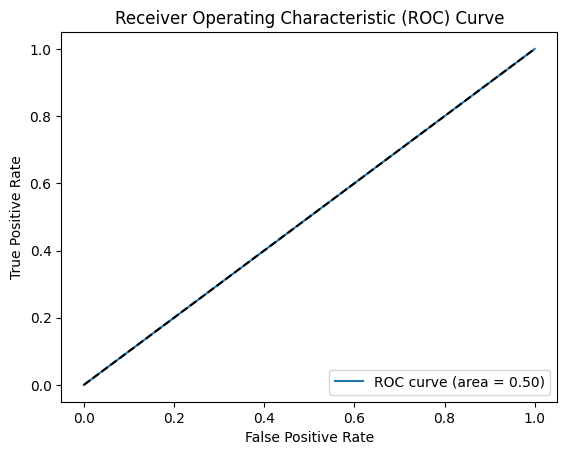

In [54]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# Optionally, you can plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [55]:
model =  RandomForestClassifier()

In [56]:
X_train_encoded = pd.get_dummies(X_train)

In [57]:
model.fit(X_train_encoded, y_train)

RandomForestClassifier()

In [58]:
X_test_encoded = pd.get_dummies(X_test)

In [59]:
y_pred=model.predict(X_test_encoded)

In [60]:
accuracyrf = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracyrf)

Accuracy: 0.9816236972024136


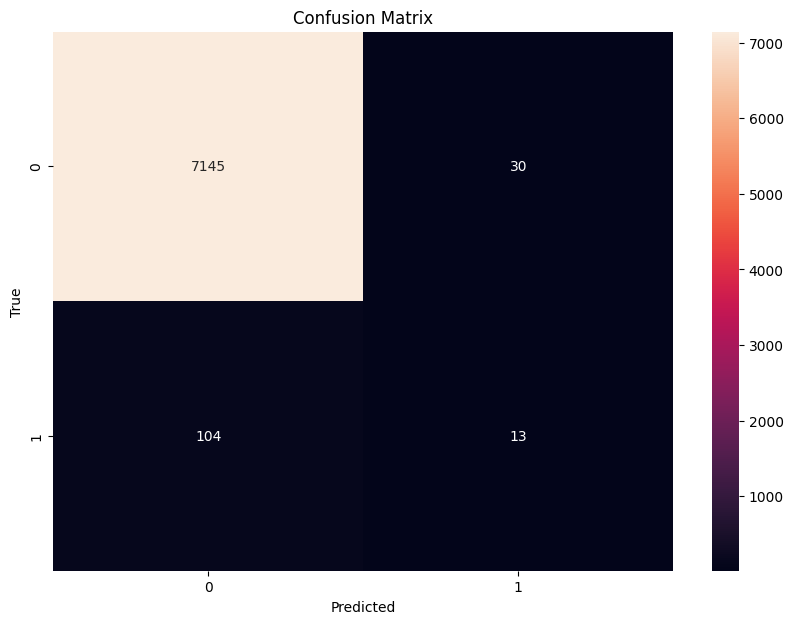

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [62]:
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7175
           1       0.30      0.11      0.16       117

    accuracy                           0.98      7292
   macro avg       0.64      0.55      0.58      7292
weighted avg       0.97      0.98      0.98      7292



ROC AUC Score: 0.5534649632210609


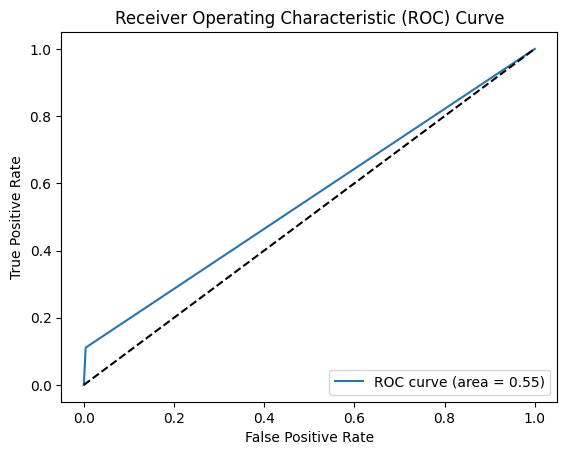

In [63]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

# Optionally, you can plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

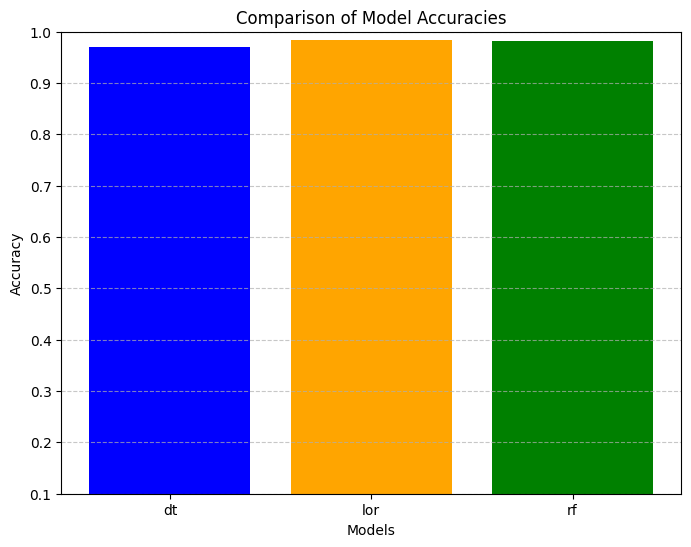

In [67]:
models = ['dt', 'lor', 'rf']
accuracy = [accuracydt,accuracylor,accuracyrf]  # Replace these values with the accuracy of your models

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0.1, 1)  # Adjust the y-axis limits if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()